In [1]:
%matplotlib inline
import cesm_package as cp # Import our package
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
x = np.linspace(-np.pi, np.pi, 24).reshape(2, 3, 4)
da_f = np.sin(x)

xs = [1, 2]
ys = [-1, -2, -3]
times = pd.date_range(start='2000-01-01', periods=4, freq='M')
f = xr.DataArray(da_f, dims=['x', 'y', 'time'], 
                 coords={'x': xs, 'y': ys, 'time': times})
f

<xarray.DataArray (x: 2, y: 3, time: 4)>
array([[[-1.224647e-16, -2.697968e-01, -5.195840e-01, -7.308360e-01],
        [-8.878852e-01, -9.790841e-01, -9.976688e-01, -9.422609e-01],
        [-8.169699e-01, -6.310879e-01, -3.984011e-01, -1.361666e-01]],

       [[ 1.361666e-01,  3.984011e-01,  6.310879e-01,  8.169699e-01],
        [ 9.422609e-01,  9.976688e-01,  9.790841e-01,  8.878852e-01],
        [ 7.308360e-01,  5.195840e-01,  2.697968e-01,  1.224647e-16]]])
Coordinates:
  * x        (x) int64 1 2
  * y        (y) int64 -1 -2 -3
  * time     (time) datetime64[ns] 2000-01-31 2000-02-29 2000-03-31 2000-04-30

In [9]:
mean = cp.compute_mean(f, dims=['time'])

# or 

# mean = cp.statistics.compute_mean(f, dims=['time'])
mean

<xarray.DataArray (x: 2, y: 3)>
array([[-0.380054, -0.951725, -0.495656],
       [ 0.495656,  0.951725,  0.380054]])
Coordinates:
  * x        (x) int64 1 2
  * y        (y) int64 -1 -2 -3

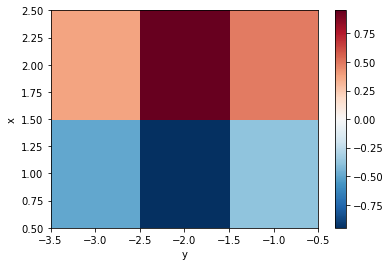

In [4]:
mean.plot()

In [5]:
clim = cp.compute_seasonal_climatology(f)

# or 

# clim = cp.climatologies.compute_seasonal_climatology(f)

In [6]:
clim

<xarray.DataArray (x: 2, y: 3, season: 2)>
array([[[-0.134898, -0.62521 ],
        [-0.933485, -0.969965],
        [-0.724029, -0.267284]],

       [[ 0.267284,  0.724029],
        [ 0.969965,  0.933485],
        [ 0.62521 ,  0.134898]]])
Coordinates:
  * x        (x) int64 1 2
  * y        (y) int64 -1 -2 -3
  * season   (season) object 'DJF' 'MAM'

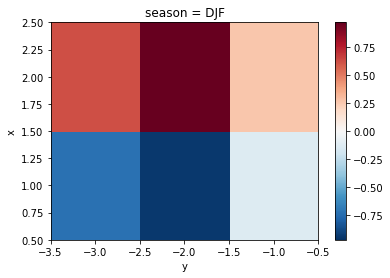

In [7]:
clim.sel(season='DJF').plot()

In [8]:
cp.__version__

'0.1'